In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

## Loading Data

In [2]:
DataFrame = pd.read_csv("DataSets/marketing_campaign.csv")
DataFrame.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## Data Cleaning

In [3]:
DataFrame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
print("Entries before drop NA values: ", len(DataFrame))
DataFrame = DataFrame.dropna()
print("Entries after drop NA values: ", len(DataFrame))

Entries before drop NA values:  2240
Entries after drop NA values:  2216


In [5]:
DataFrame["Dt_Customer"] = pd.to_datetime(DataFrame["Dt_Customer"], format="%d-%m-%Y")
Dates = []
for i in DataFrame["Dt_Customer"]:
    i = i.date()
    Dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(Dates))
print("The oldest customer's enrolment date in the records:",min(Dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [6]:
# Creating a feature Days_Customer
Days = []
Reference = max(Dates)

for i in Dates:
    Count = Reference - i 
    Days.append(Count)
DataFrame["Days_Customer"] = Days
DataFrame["Days_Customer"] = pd.to_numeric(DataFrame["Days_Customer"], errors="coerce")
DataFrame.tail(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,1,0,0,0,0,0,3,11,0,40608000000000000
2231,9817,1970,Master,Single,44802.0,0,0,2012-08-21,71,853,...,0,0,0,0,0,0,3,11,0,58492800000000000
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,0,0,0,0,0,0,3,11,0,58838400000000000
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,0,3,11,0,33868800000000000
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,0,0,0,0,0,0,3,11,0,31363200000000000
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,32918400000000000
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,1641600000000000
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,13392000000000000
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,13478400000000000
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,0,0,0,0,0,0,3,11,1,53740800000000000


In [7]:
print("Total categories in the feature Marital_Status:\n", DataFrame["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", DataFrame["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


**In the next bit, I will be performing the following steps to engineer some new features:**

* Extract the **"Age"** of a customer by the **"Year_Birth"** indicating the birth year of the respective person.
* Create another feature **"Spent"** indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.
* Create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, Creating feature indicating **"Family_Size"**
* Create a feature **"Is_Parent"** to indicate parenthood status
* Lastly, I will create three categories in the **"Education"** by simplifying its value counts.
* Dropping some of the redundant features


In [8]:
DataFrame["Age"] = 2023 - DataFrame["Year_Birth"]
DataFrame["Spent"] = DataFrame["MntWines"]+ DataFrame["MntFruits"]+ DataFrame["MntMeatProducts"]+ DataFrame["MntFishProducts"]+ DataFrame["MntSweetProducts"]+ DataFrame["MntGoldProds"]
DataFrame["Living_With"] = DataFrame["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
DataFrame["Children"] = DataFrame["Kidhome"]+DataFrame["Teenhome"]
DataFrame["Family_Size"] = DataFrame["Living_With"].replace({"Alone": 1, "Partner": 2}) + DataFrame["Children"]
DataFrame["Is_Parent"] = np.where(DataFrame.Children > 0, 1, 0)
DataFrame["Education"]=DataFrame["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
DataFrame=DataFrame.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
DataFrame = DataFrame.drop(to_drop, axis=1)
DataFrame.head(10)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Days_Customer,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,66,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,69,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,58,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,39,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,42,422,Partner,1,3,1
5,Postgraduate,62513.0,0,1,16,520,42,98,0,42,...,0,0,0,25315200000000000,56,716,Partner,1,3,1
6,Graduate,55635.0,0,1,34,235,65,164,50,49,...,0,0,0,51235200000000000,52,590,Alone,1,2,1
7,Postgraduate,33454.0,1,0,32,76,10,56,3,1,...,0,0,0,36028800000000000,38,169,Partner,1,3,1
8,Postgraduate,30351.0,1,0,19,14,0,24,3,3,...,0,0,1,33523200000000000,49,46,Partner,1,3,1
9,Postgraduate,5648.0,1,1,68,28,0,6,1,1,...,0,0,0,9331200000000000,73,49,Partner,2,4,1


In [9]:
DataFrame.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,54.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,46.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,53.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,64.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,130.000000,2525.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

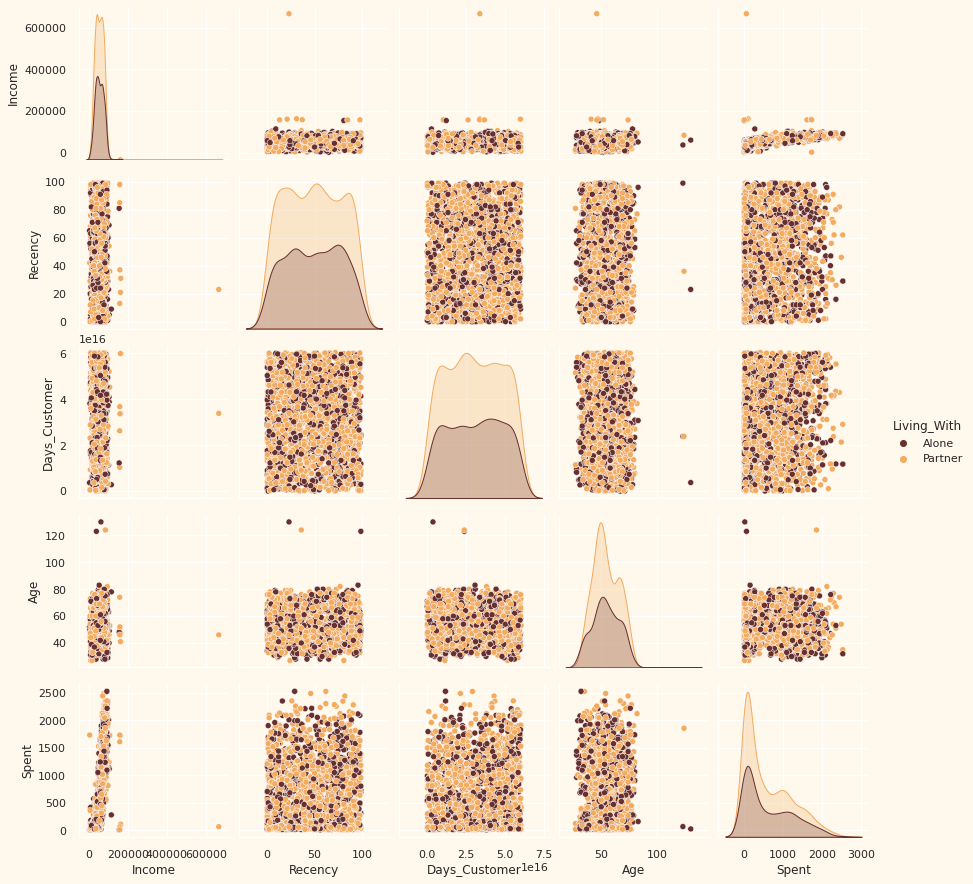

In [10]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Days_Customer", "Age", "Spent", "Living_With"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(DataFrame[To_Plot], hue= "Living_With",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [11]:
DataFrame = DataFrame[(DataFrame["Age"]<90)]
DataFrame = DataFrame[(DataFrame["Income"]<600000)]
print("Number of entries ", len(DataFrame))


Number of entries  2212


<AxesSubplot:>

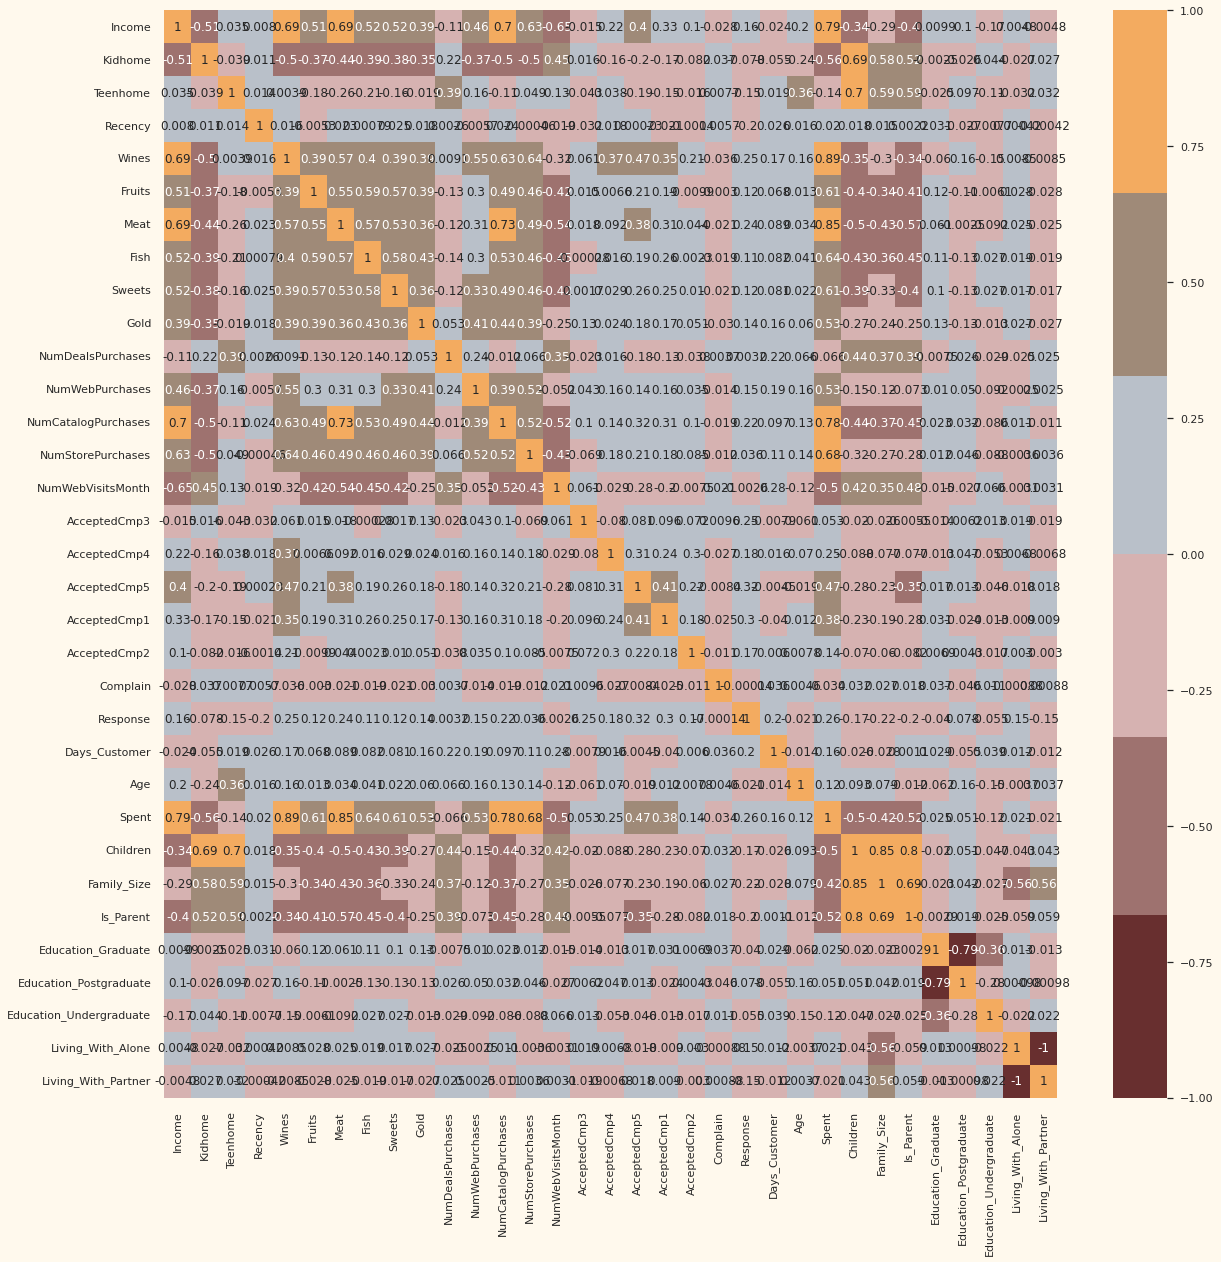

In [12]:
Columns = ['Education', 'Living_With']
DataFrame = pd.get_dummies(DataFrame, columns=Columns)
Correlation_Matrix = DataFrame.corr()
plt.figure(figsize=(20,20))
sns.heatmap(Correlation_Matrix, annot=True, cmap=cmap, center=0)

In [13]:
s = (DataFrame.dtypes == 'object')
object_cols = list(s[s].index)
Lab_Encoder = LabelEncoder()
for i in object_cols:
    DataFrame[i] = DataFrame[[i]].apply(Lab_Encoder.fit_transform)
print("All features are now numerical")

All features are now numerical


In [14]:
Copy_DF = DataFrame.copy()
Columns_Detele = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
Copy_DF = Copy_DF.drop(Columns_Detele, axis=1)
Scaler = StandardScaler()
Scaler.fit(Copy_DF)
Scaled_DF = pd.DataFrame(Scaler.transform(Copy_DF), columns=Copy_DF.columns)
print("All features are now scaled")


All features are now scaled


In [15]:
Scaled_DF.tail(10)

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Age,Spent,Children,Family_Size,Is_Parent,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
2202,-1.278891,2.902796,-0.929699,-1.383005,-0.896339,-0.612295,-0.709309,-0.322294,-0.658360,-0.520857,...,-0.263814,-0.925115,1.404572,1.552784,0.632456,0.991895,-0.786220,-0.358569,-0.740959,0.740959
2203,-1.902520,1.040021,-0.929699,1.139753,-0.834071,-0.587128,-0.629025,-0.559696,-0.634019,-0.404792,...,-1.289547,-0.868672,0.069987,-0.654644,0.632456,0.991895,-0.786220,-0.358569,1.349603,-1.349603
2204,-0.332528,-0.822754,-0.929699,0.759612,1.624071,-0.410961,-0.107179,-0.450126,-0.414943,-0.462825,...,-0.092858,0.733315,-1.264598,-1.758359,-1.581139,-1.008171,1.271909,-0.358569,1.349603,-1.349603
2205,-1.168215,-0.822754,-0.929699,0.033887,-0.890409,-0.637461,-0.718230,-0.632742,-0.560993,-0.791675,...,-1.460502,-0.971597,-1.264598,-1.758359,-1.581139,0.991895,-0.786220,-0.358569,1.349603,-1.349603
2206,-0.814863,1.040021,-0.929699,1.105195,-0.896339,-0.587128,-0.713770,-0.577957,-0.609677,-0.675610,...,-0.434769,-0.958317,0.069987,0.449070,0.632456,0.991895,-0.786220,-0.358569,-0.740959,0.740959
2207,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,...,0.163575,1.218061,0.069987,0.449070,0.632456,0.991895,-0.786220,-0.358569,-0.740959,0.740959
2208,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,...,1.958607,-0.271040,2.739158,2.656499,0.632456,-1.008171,1.271909,-0.358569,-0.740959,0.740959
2209,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,...,-1.033114,1.052052,-1.264598,-1.758359,-1.581139,0.991895,-0.786220,-0.358569,1.349603,-1.349603
2210,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,...,1.103830,0.391336,0.069987,0.449070,0.632456,-1.008171,1.271909,-0.358569,-0.740959,0.740959
2211,0.042290,1.040021,0.908097,-0.311697,-0.656159,-0.587128,-0.472917,-0.651004,-0.634019,-0.443481,...,1.274785,-0.722584,1.404572,1.552784,0.632456,-1.008171,1.271909,-0.358569,-0.740959,0.740959


In [16]:
pca = PCA(n_components=3)
pca.fit(Scaled_DF)
DataFrame_PCA = pd.DataFrame(pca.transform(Scaled_DF), columns=(["Col_1", "Col_2", "Col_3"]))
DataFrame_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
Col_1,2212.0,1.927331e-16,2.880462,-6.002432,-2.537146,-0.793779,2.423204,7.414325
Col_2,2212.0,5.781993e-17,1.749420,-4.721852,-1.210506,-0.103834,1.239053,6.277110
Col_3,2212.0,8.672990e-17,1.470668,-2.660035,-1.232656,-0.393863,1.273935,3.965695


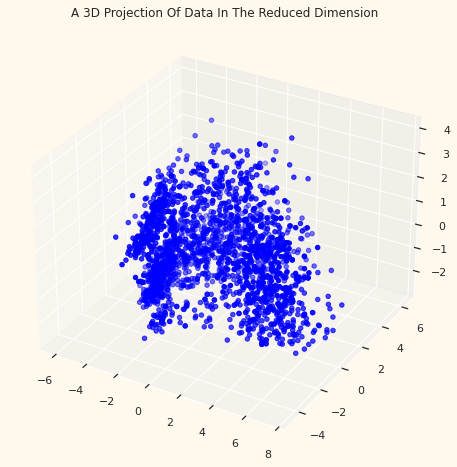

In [17]:
x = DataFrame_PCA["Col_1"]
y = DataFrame_PCA["Col_2"]
z = DataFrame_PCA["Col_3"]
# to plot
Figure = plt.figure(figsize=(12,8))
ax = Figure.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering

Elbow Method to determine the number of clusters to be formed:


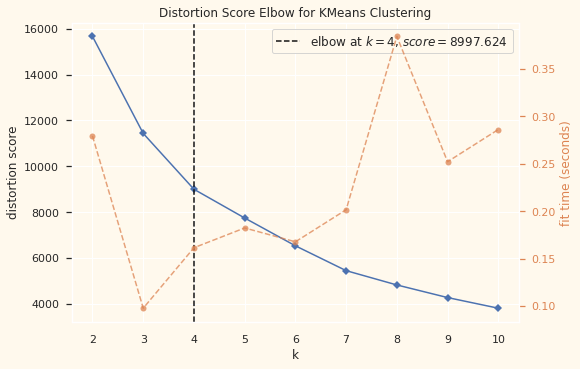

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
#Elbow method
print("Elbow Method to determine the number of clusters to be formed:")
ElbowMethod = KElbowVisualizer(KMeans(), k=10)
ElbowMethod.fit(DataFrame_PCA)
ElbowMethod.show()

In [19]:
Clustering = AgglomerativeClustering(n_clusters=4)
yhat_Clustering = Clustering.fit_predict(DataFrame_PCA)
DataFrame_PCA["Clusters"] = yhat_Clustering
DataFrame["Clusters"] = yhat_Clustering

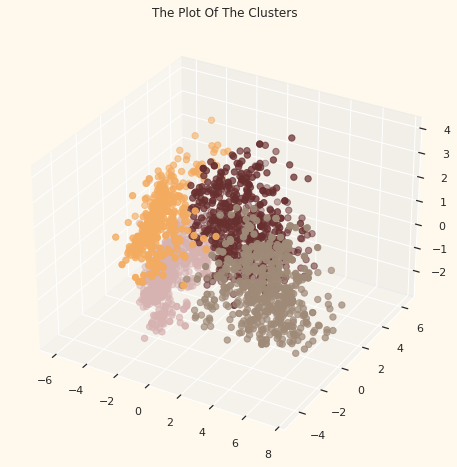

In [20]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=DataFrame_PCA["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

## Evaluating Models

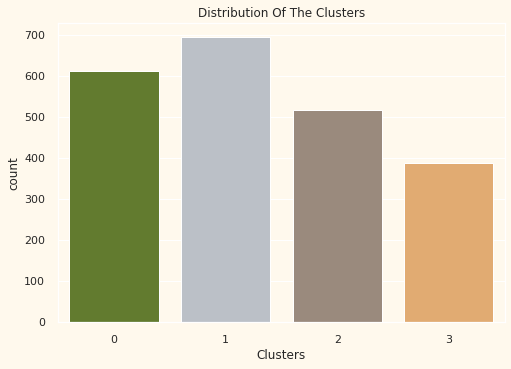

In [21]:
colors = ["#682F","#B9C0C9", "#9F8A78","#F3AB60"]
Plot = sns.countplot(x=DataFrame["Clusters"], palette=colors)
Plot.set_title("Distribution Of The Clusters")
plt.show()

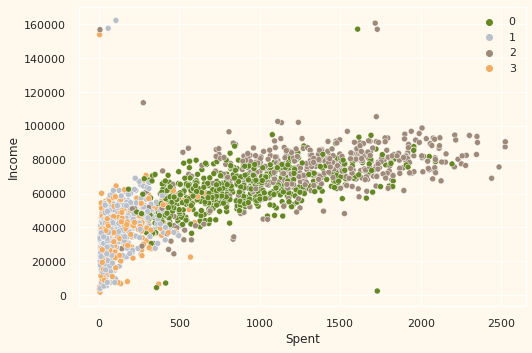

In [22]:
Plot = sns.scatterplot(data=DataFrame, x=DataFrame["Spent"], y=DataFrame["Income"], hue=DataFrame["Clusters"], palette=colors)
plt.legend()
plt.show()

In [23]:
DataFrame["Clusters"].value_counts()

Clusters
1    695
0    612
2    518
3    387
Name: count, dtype: int64

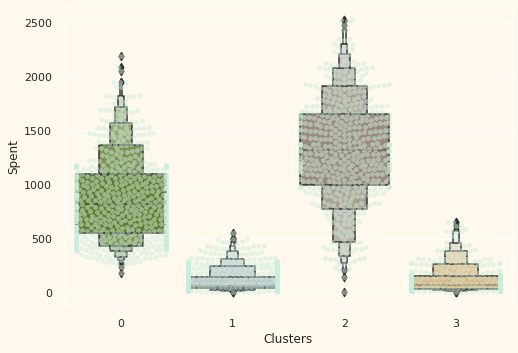

In [24]:
plt.figure()
plot=sns.swarmplot(x=DataFrame["Clusters"], y=DataFrame["Spent"], color= "#CBEDDD", alpha=0.5 )
plot=sns.boxenplot(x=DataFrame["Clusters"], y=DataFrame["Spent"], palette=colors)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

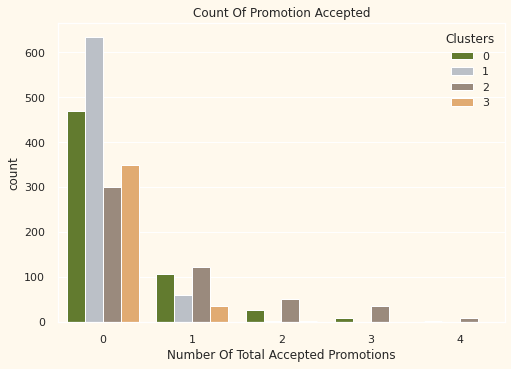

In [25]:
DataFrame["Total_Promos"] = DataFrame["AcceptedCmp1"]+DataFrame["AcceptedCmp2"]+DataFrame["AcceptedCmp3"]+DataFrame["AcceptedCmp4"]+DataFrame["AcceptedCmp5"]
plt.figure()
plot = sns.countplot(x=DataFrame["Total_Promos"],hue=DataFrame["Clusters"], palette= colors)
plot.set_title("Count Of Promotion Accepted")
plot.set_xlabel("Number Of Total Accepted Promotions")
plt.show

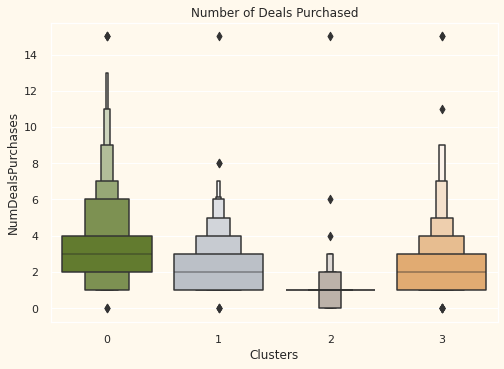

In [26]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=DataFrame["NumDealsPurchases"],x=DataFrame["Clusters"], palette= colors)
pl.set_title("Number of Deals Purchased")
plt.show()


<Figure size 576x396 with 0 Axes>

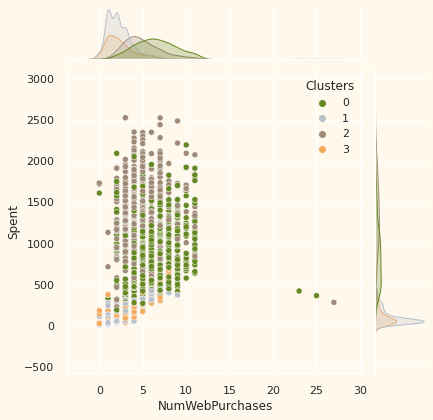

<Figure size 576x396 with 0 Axes>

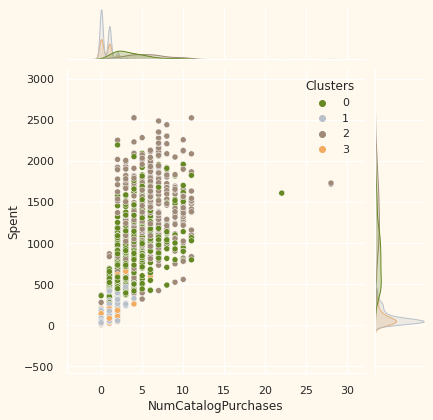

<Figure size 576x396 with 0 Axes>

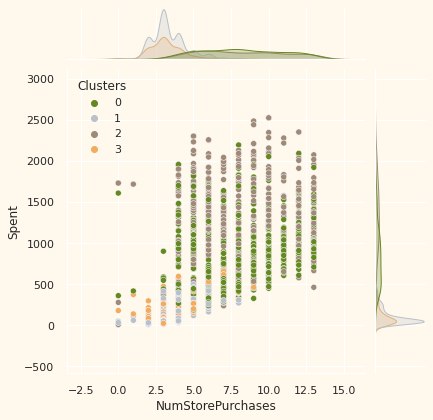

<Figure size 576x396 with 0 Axes>

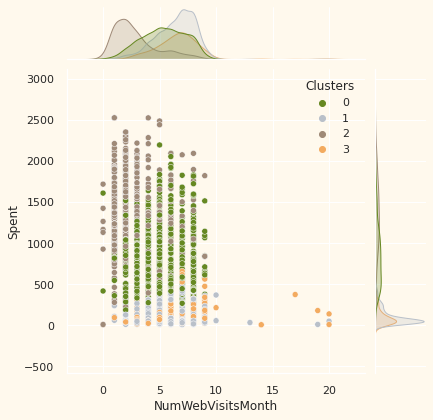

In [27]:
#for more details on the purchasing style 
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in Places:
    plt.figure()
    sns.jointplot(x=DataFrame[i],y = DataFrame["Spent"],hue=DataFrame["Clusters"], palette= colors)
    plt.show()

In [28]:
DataFrame.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Children,Family_Size,Is_Parent,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,Clusters,Total_Promos
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,True,False,False,True,False,2,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,2,3,1,True,False,False,True,False,3,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,2,0,True,False,False,False,True,2,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,3,1,True,False,False,False,True,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,1,3,1,False,True,False,False,True,1,0
